In [1]:
import torch, random
from statistics import mean
from cebmf_torch import cEBMF
import matplotlib.pyplot as plt
# ---- config
NUM_RUNS   = 20
N, P       = 50, 40
NOISE_STD  = 1.0
MAXIT      = 50
TOL        = 1e-9   # numerical tolerance for strictness

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)

def is_strictly_increasing(xs, tol=0.0001):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] - tol for t in range(len(xs)-1))

def is_strictly_decreasing(xs, tol=0.001):
    # xs[t+1] < xs[t] - tol  for all t
    return all(xs[t+1] < xs[t] + tol for t in range(len(xs)-1))

def one_run(seed):
    # reproducibility
    random.seed(seed)
    torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
    u = torch.rand(N, device=device)
    v = torch.rand(P, device=device)
    Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

    model = cEBMF(data=Y, K=5, prior_F="exp",
                 prior_L="exp") 
    model.fit(maxit=MAXIT)

    loss_hist = model.obj                       # your stored objective = negative ELBO
    return(loss_hist)
 


results=[]

for i in range(NUM_RUNS):
    results.append( one_run(i))
 

Converged after 37 iterations.
Converged after 53 iterations.
5
Converged after 80 iterations.
Converged after 53 iterations.
Converged after 75 iterations.
Converged after 53 iterations.
Converged after 65 iterations.
Converged after 54 iterations.
4
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Converged after 64 iterations.
Converged after 53 iterations.
Conv

In [2]:
import matplotlib.pyplot as plt

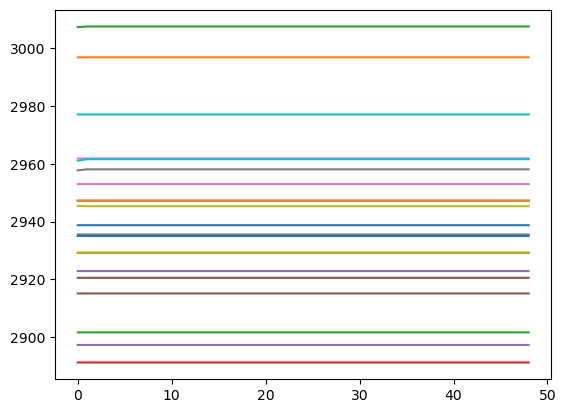

In [3]:
plt.plot(results[0])
for i in range(NUM_RUNS):
    plt.plot(results[i])

In [4]:
h=0

for i in range(NUM_RUNS):
    if (is_strictly_decreasing(results[i], tol=0.1))== False:
        h=h+1
print(h)

3


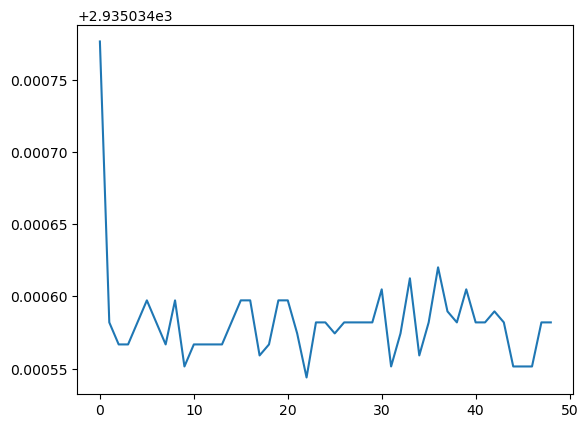

In [5]:
plt.plot(results[i])